In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("mall customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df = df.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "score"})

In [ ]:
df.drop("CustomerID", axis=1, inplace= True)

In [ ]:
df.head()

,Gender,Age,Income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# visualization

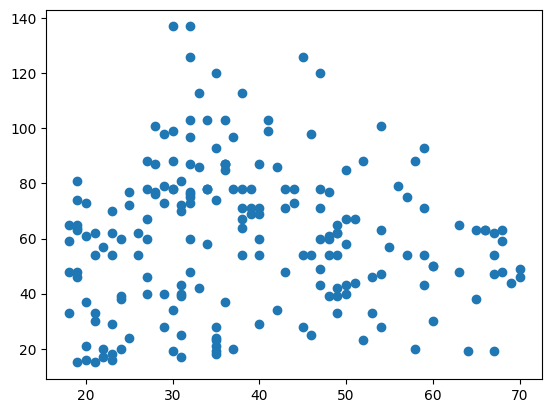

In [ ]:
plt.scatter(x =df["Age"], y =df["Income"])

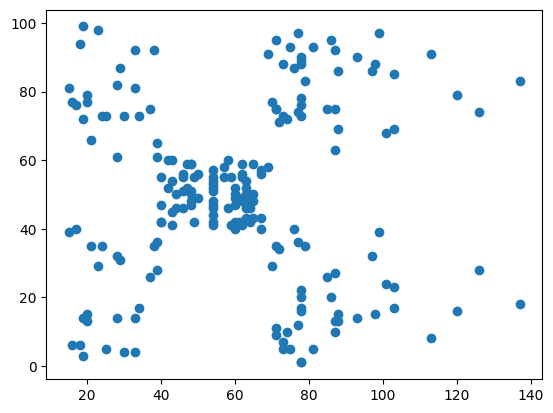

In [ ]:
plt.scatter(df.Income, df.score)

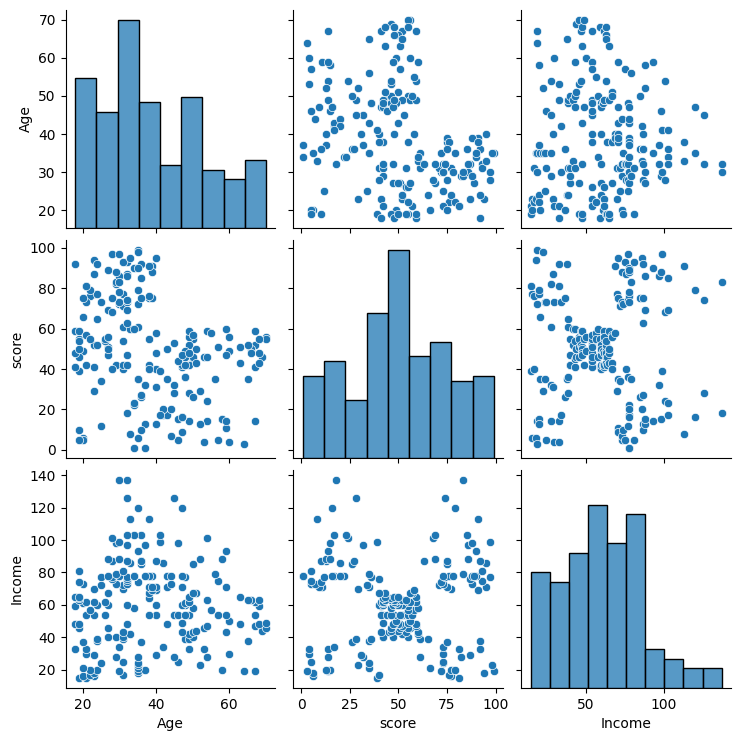

In [ ]:
sns.pairplot(df[["Age","score","Income"]])

Text(0.5, 1.0, 'score gains respect to Income')

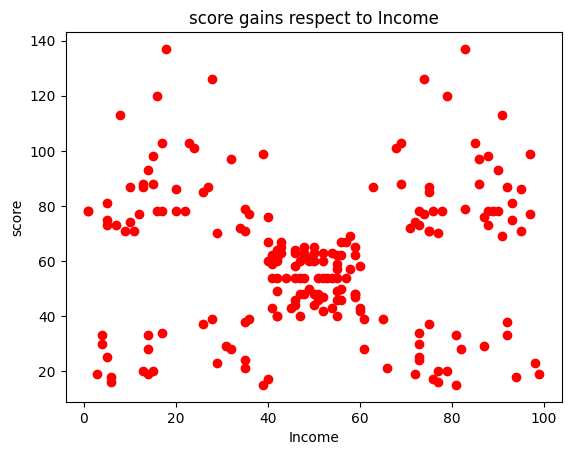

In [ ]:
plt.scatter(df.score, df.Income,marker= "o", color="red")
plt.xlabel("Income")
plt.ylabel("score")
plt.title("score gains respect to Income")

# algorithmn

In [ ]:
import sklearn.cluster as cluster

In [ ]:
kmeans = cluster.KMeans() #n_clusters=8

In [ ]:
predicted = kmeans.fit_predict(df[['Income','score']])
predicted

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 6, 1, 6, 1, 1, 6, 6, 1, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 0, 2, 6, 2, 0, 2, 0, 2,
       6, 2, 0, 2, 0, 2, 0, 2, 0, 2, 6, 2, 0, 2, 6, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 6, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7,
       5, 7])

In [ ]:
model = kmeans.fit(df[["score","Income"]])

In [ ]:
predicted= model.predict(df[["score","Income"]])

In [ ]:
predicted

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 6, 7, 5, 7, 6, 7, 6, 7,
       5, 7, 6, 7, 6, 7, 6, 7, 6, 7, 5, 7, 6, 7, 5, 7, 6, 7, 6, 7, 6, 7,
       6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7,
       6, 7, 6, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [ ]:
df['predicted'] = predicted
df.head()

,Gender,Age,Income,score,predicted
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


In [ ]:
centers = kmeans.cluster_centers_
centers

array([[ 51.26315789,  45.97368421],
       [ 22.        , 109.7       ],
       [ 82.72727273, 108.18181818],
       [ 19.52380952,  25.14285714],
       [ 80.04761905,  25.0952381 ],
       [ 47.55319149,  62.23404255],
       [ 14.29166667,  79.70833333],
       [ 81.89285714,  78.03571429]])

# visualize the centers

In [ ]:
df0 = df[df.predicted == 0]
df1 = df[df.predicted == 1]
df2 = df[df.predicted == 2]
df3 = df[df.predicted == 3]
df4 = df[df.predicted == 4]
df5 = df[df.predicted == 5]
df6 = df[df.predicted == 6]
df7 = df[df.predicted == 7]

In [ ]:
df1.head()

,Gender,Age,Income,score,predicted
180,Female,37,97,32,1
182,Male,46,98,15,1
184,Female,41,99,39,1
186,Female,54,101,24,1
188,Female,41,103,17,1


In [ ]:
df1.shape

(10, 5)

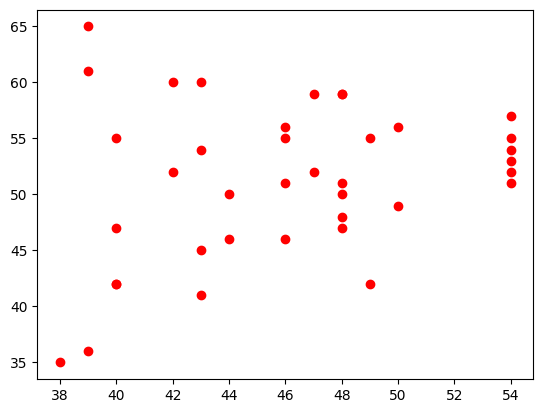

In [ ]:
plt.scatter(df0.Income , df0.score, color='red', label='cluster_0')

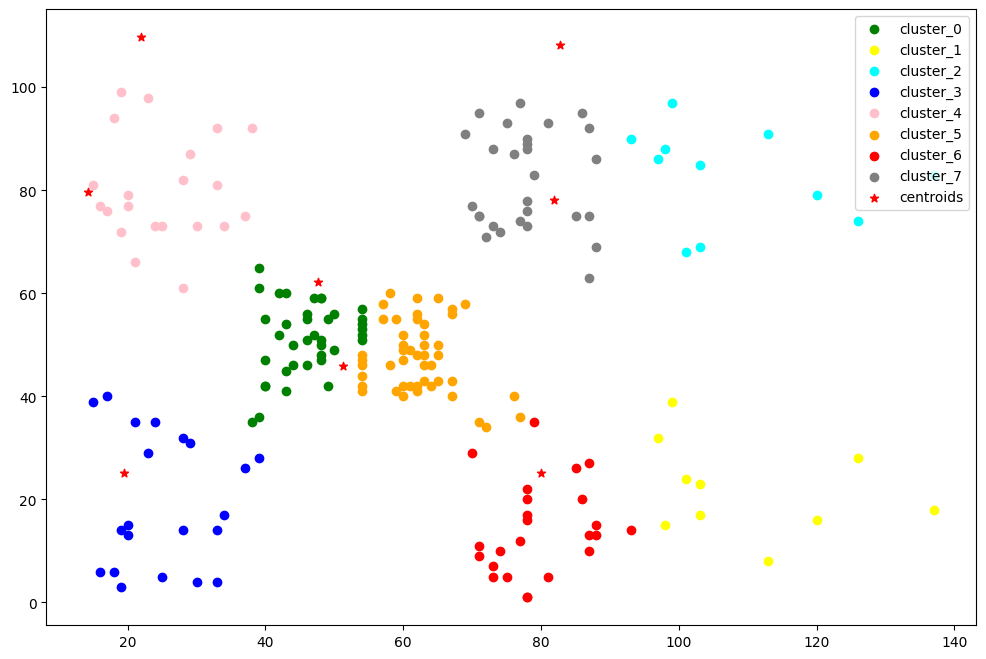

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df0.Income , df0.score, color='green', label='cluster_0')
plt.scatter(df1.Income , df1.score, color='yellow', label='cluster_1')
plt.scatter(df2.Income , df2.score, color='cyan', label='cluster_2')
plt.scatter(df3.Income , df3.score, color='blue', label='cluster_3')
plt.scatter(df4.Income , df4.score, color='pink', label='cluster_4')
plt.scatter(df5.Income , df5.score, color='orange', label='cluster_5')
plt.scatter(df6.Income , df6.score, color='red', label='cluster_6')
plt.scatter(df7.Income , df7.score, color='gray', label='cluster_7')

plt.scatter(centers[:,0], centers[:,1], color='red', label='centroids',marker= "*")

plt.legend()

# elbow method

In [ ]:
wcss = []
clstr = range(1,20)

for k in clstr:
    km = cluster.KMeans(n_clusters=k)
    km.fit(df[['score', 'Income']])
    wcss.append(km.inertia_) #sum of squared distance

In [ ]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 25063.652515864094,
 21850.165282585636,
 19664.685196005543,
 17577.687828862057,
 15810.838613705502,
 14741.276155776066,
 12738.312658437659,
 11811.937102028407,
 11297.702157388536,
 10173.453876920183,
 9344.491751533405,
 8764.268883431385]

Text(0.5, 0, 'Num of Clusters')

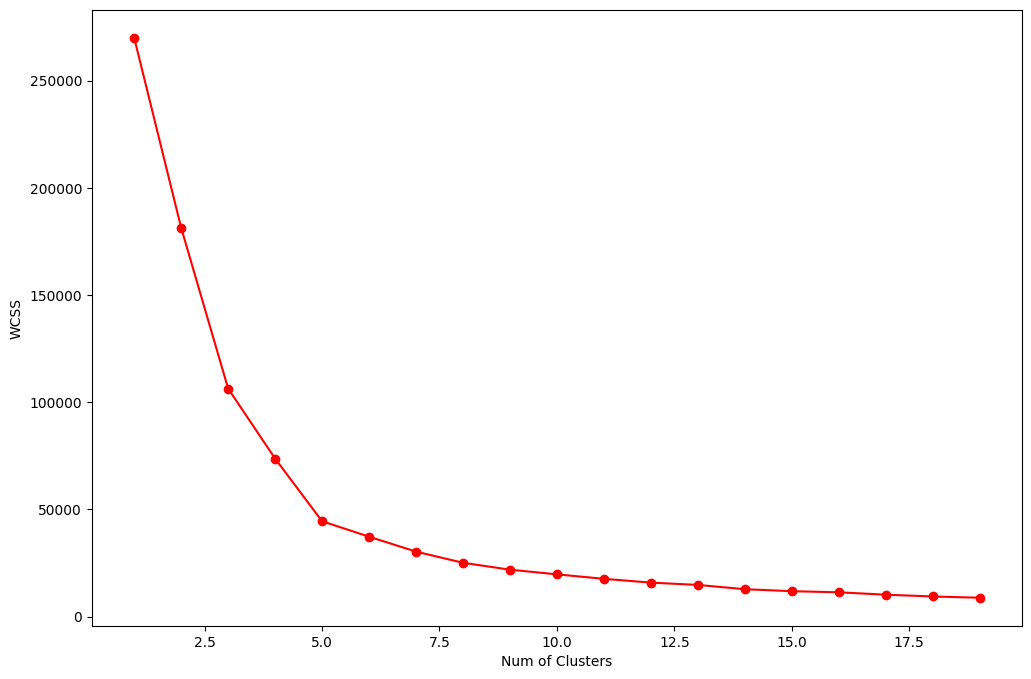

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(clstr, wcss, marker='o', color='red')
plt.ylabel('WCSS')
plt.xlabel('Num of Clusters')

# plot best k with knee

In [ ]:
#pip install kneed

In [ ]:
from kneed import KneeLocator
kn = KneeLocator(clstr, wcss, curve='convex',direction='decreasing')

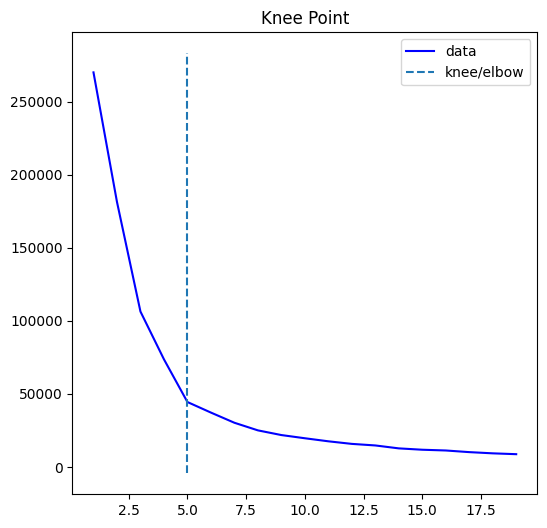

In [ ]:
kn.plot_knee()

In [ ]:
kn.knee

5

# after elbow

In [ ]:
kmeans2 = cluster.KMeans(n_clusters=5)
predicted = kmeans2.fit_predict(df[['Income','score']])
df['predicted'] = predicted
df.head()

,Gender,Age,Income,score,predicted
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


In [ ]:
centers2 = kmeans2.cluster_centers_

In [ ]:
centers2

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

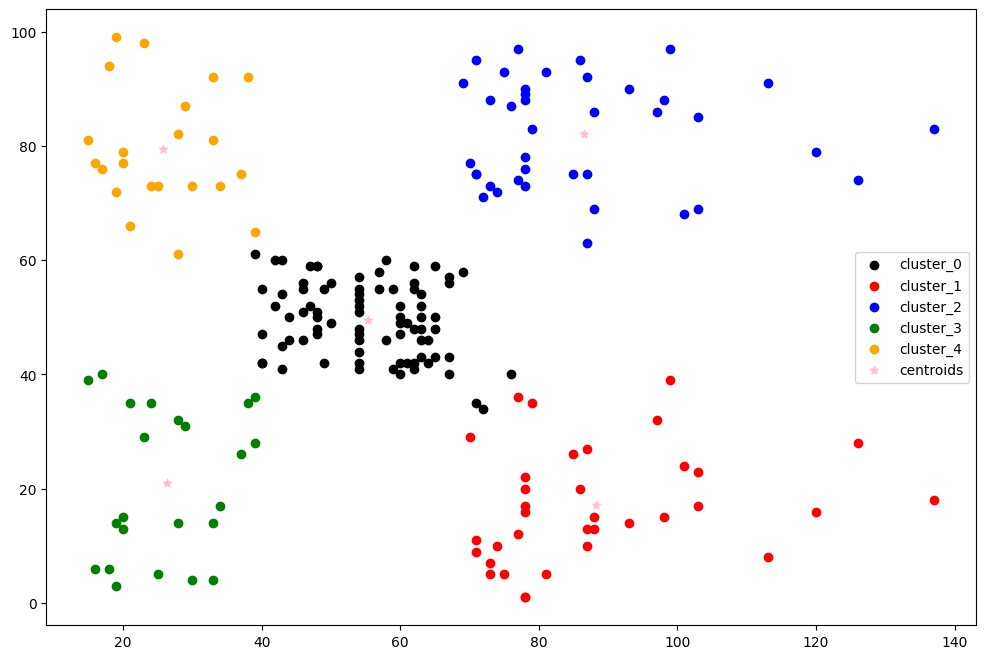

In [ ]:
df0 = df[df.predicted == 0]
df1 = df[df.predicted == 1]
df2 = df[df.predicted == 2]
df3 = df[df.predicted == 3]
df4 = df[df.predicted == 4]

plt.figure(figsize=(12,8))
plt.scatter(df0.Income , df0.score, color='black', label='cluster_0')
plt.scatter(df1.Income , df1.score, color='red', label='cluster_1')
plt.scatter(df2.Income , df2.score, color='blue', label='cluster_2')
plt.scatter(df3.Income , df3.score, color='green', label='cluster_3')
plt.scatter(df4.Income , df4.score, color='orange', label='cluster_4')

plt.scatter(centers2[:,0], centers2[:,1], color='pink', label='centroids', marker= "*")

plt.legend()